In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as se
import keras
import pickle 
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from keras.models import save_model
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
from xgboost import XGBClassifier
encoder = LabelEncoder()
ohe = OneHotEncoder()
sc = StandardScaler()
import warnings
warnings.filterwarnings('ignore')
# Any results you write to the current directory are saved as output.

['heart.csv']


Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
df  = pd.read_csv('../input/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

 - age: The person's age in years
 - sex: The person's sex (1 = male, 0 = female)
 - cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
 - trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
 - chol: The person's cholesterol measurement in mg/dl
 - fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
 - restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
 - thalach: The person's maximum heart rate achieved
 - exang: Exercise induced angina (1 = yes; 0 = no)
 - oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
 - slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
 - ca: The number of major vessels (0-3)
 - thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
 - target: Heart disease (0 = no, 1 = yes)


### Exploratory Data Analysis

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [7]:
df['sex'][df['sex']==1] = 'male'
df['sex'][df['sex']==0] = 'female'

In [8]:
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomati'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 1] = 'upsloping'
df['st_slope'][df['st_slope'] == 2] = 'flat'
df['st_slope'][df['st_slope'] == 3] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 1] = 'normal'
df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'

In [9]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1
5,57,male,0,140,192,lower than 120mg/ml,ST-T wave abnormality,148,no,0.4,upsloping,0,normal,1
6,56,female,typical angina,140,294,lower than 120mg/ml,normal,153,no,1.3,upsloping,0,fixed defect,1
7,44,male,typical angina,120,263,lower than 120mg/ml,ST-T wave abnormality,173,no,0.0,flat,0,reversable defect,1
8,52,male,atypical angina,172,199,greater than 120mg/ml,ST-T wave abnormality,162,no,0.5,flat,0,reversable defect,1
9,57,male,atypical angina,150,168,lower than 120mg/ml,ST-T wave abnormality,174,no,1.6,flat,0,fixed defect,1


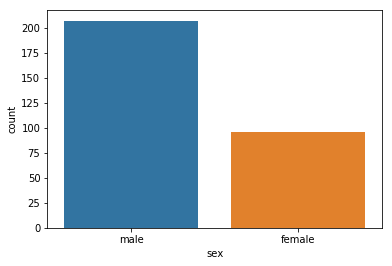

In [10]:
se.countplot(data=df,x = 'sex')

In [11]:
impaact_on_gender = pd.crosstab(df['target'],df['sex'])
impaact_on_gender


sex,female,male
target,,
0,24,114
1,72,93


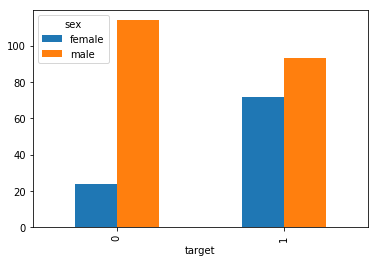

In [12]:
impaact_on_gender.plot(kind = 'bar')

In [13]:
df[df.duplicated()  == True]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
164,38,male,atypical angina,138,175,lower than 120mg/ml,ST-T wave abnormality,173,no,0.0,flat,4,fixed defect,1


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
male_gender = len(df[df.sex == 1])
female_gender = len(df[df.sex == 0])

print("In this dataset there exists {0} male subjects and {1} female subjects which computes to {2}% for males and {3}% for females.".format(male_gender, female_gender, round((male_gender/len(df.sex)), 2)*100, round((female_gender/len(df.sex)), 2)*100))

In this dataset there exists 0 male subjects and 0 female subjects which computes to 0.0% for males and 0.0% for females.


In [16]:
impaact_on_gender

sex,female,male
target,,
0,24,114
1,72,93


(-1.106646232524204,
 1.1102916855042257,
 -1.1109403547242989,
 1.1005209692725857)

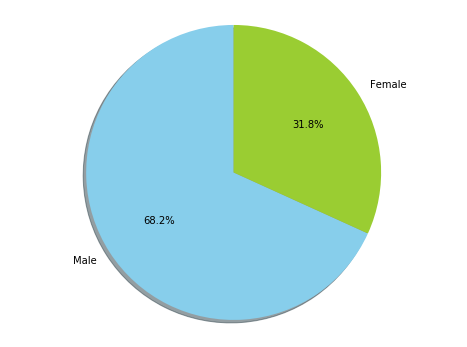

In [17]:
male =len(df[df['sex'] == 'male'])
female = len(df[df['sex']== 'female'])

plt.figure(figsize=(8,6))

# Data to plot
labels = 'Male','Female'
sizes = [male,female]
colors = ['skyblue', 'yellowgreen']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')


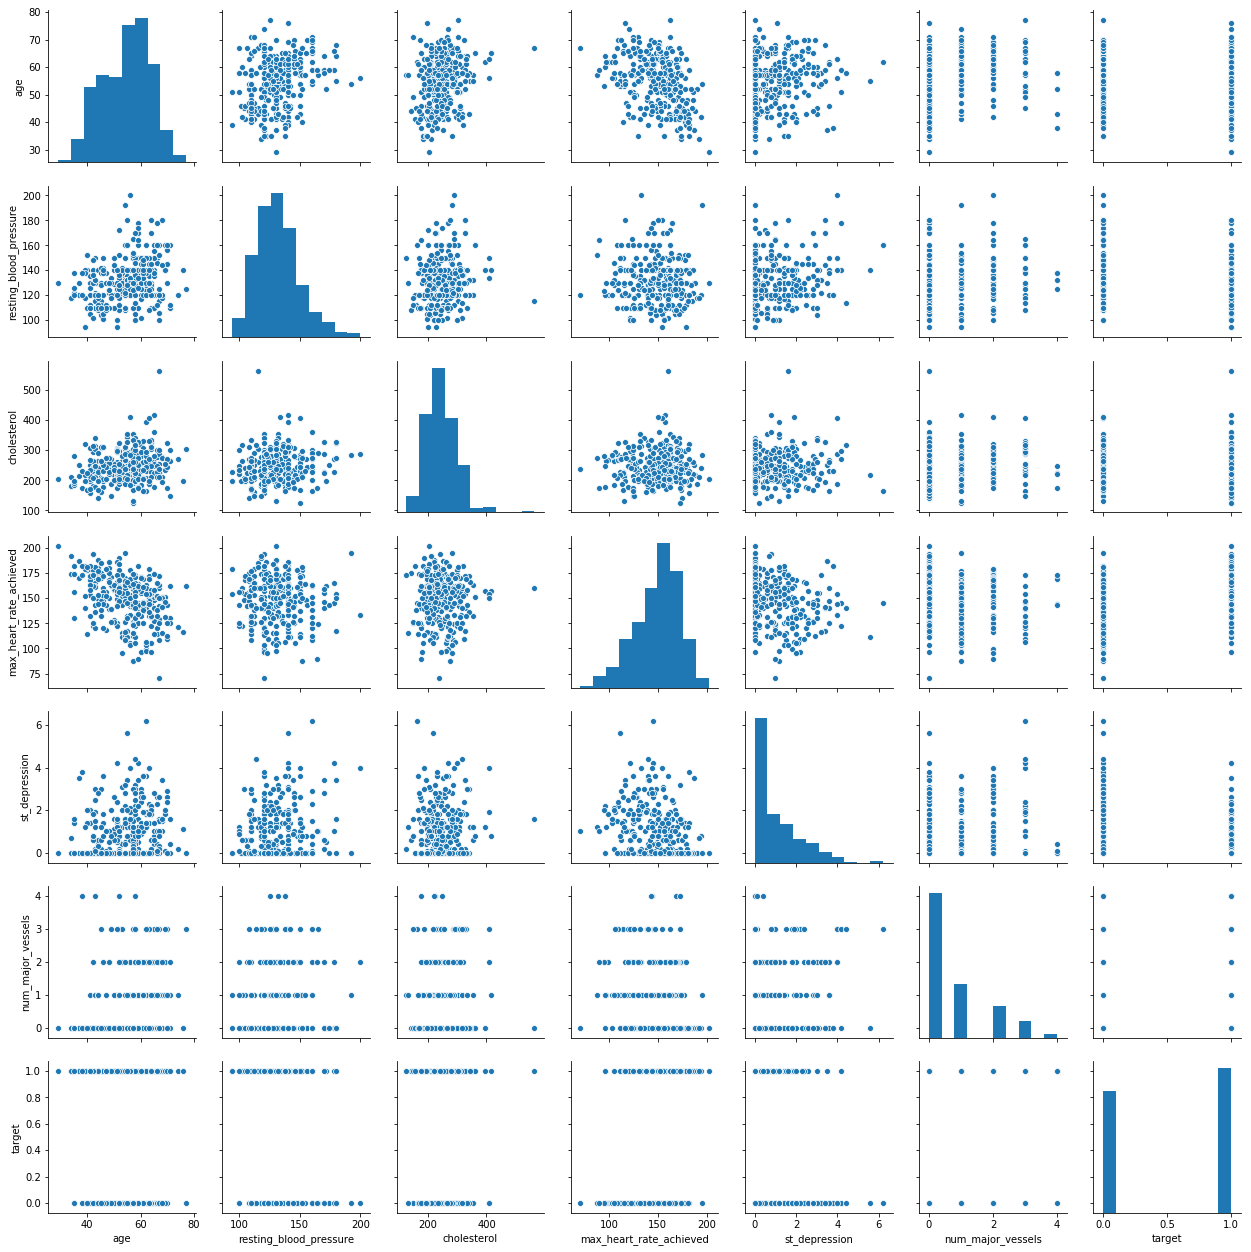

In [18]:
se.pairplot(df)

In [19]:
df['chest_pain_type'].value_counts()

0                   143
atypical angina      86
typical angina       50
non-anginal pain     23
Name: chest_pain_type, dtype: int64

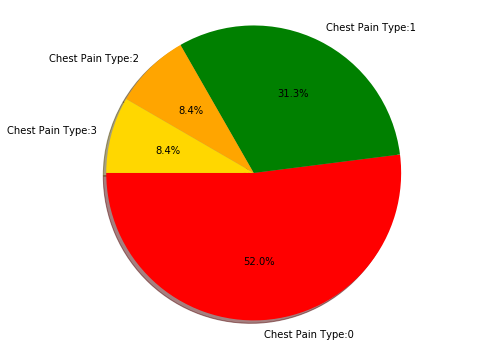

In [20]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
sizes = [len(df[df['chest_pain_type'] == 0]),len(df[df['chest_pain_type'] == 'atypical angina']),
         len(df[df['chest_pain_type'] == 'non-anginal pain']),
         len(df[df['chest_pain_type'] == 'non-anginal pain'])]
colors = ['red', 'green','orange','gold']
explode = (0, 0,0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

In [21]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


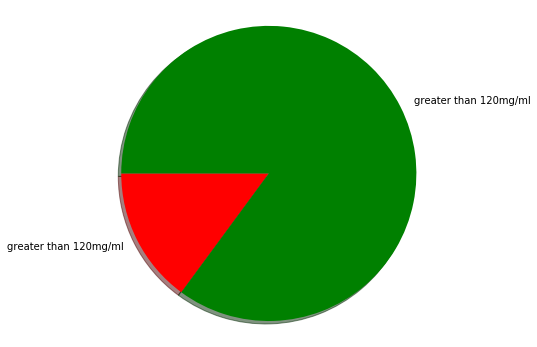

In [22]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'greater than 120mg/ml','greater than 120mg/ml'
sizes = [len(df[df['fasting_blood_sugar'] == 'greater than 120mg/ml']),len(df[df['fasting_blood_sugar'] == 'lower than 120mg/ml'])]
colors = ['red', 'green','orange','gold']
explode = (0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

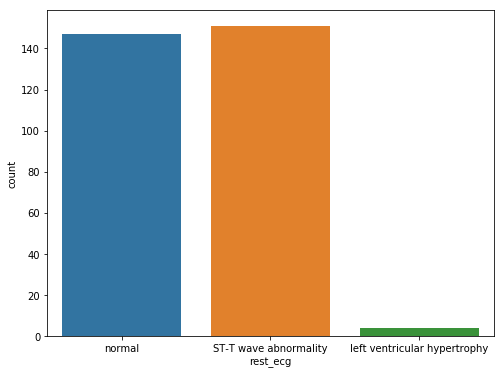

In [23]:
plt.figure(figsize=(8,6))
se.countplot(x = df['rest_ecg'],data = df)

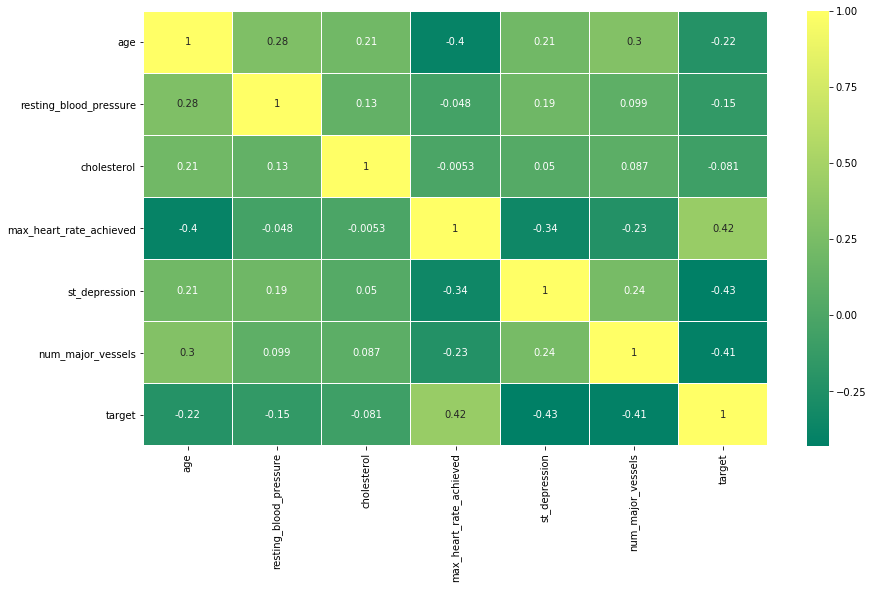

In [24]:
plt.figure(figsize=(14,8))
se.heatmap(df.corr(), annot = True, cmap='summer',linewidths=.1)
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
age                        302 non-null int64
sex                        302 non-null object
chest_pain_type            302 non-null object
resting_blood_pressure     302 non-null int64
cholesterol                302 non-null int64
fasting_blood_sugar        302 non-null object
rest_ecg                   302 non-null object
max_heart_rate_achieved    302 non-null int64
exercise_induced_angina    302 non-null object
st_depression              302 non-null float64
st_slope                   302 non-null object
num_major_vessels          302 non-null int64
thalassemia                302 non-null object
target                     302 non-null int64
dtypes: float64(1), int64(6), object(7)
memory usage: 45.4+ KB


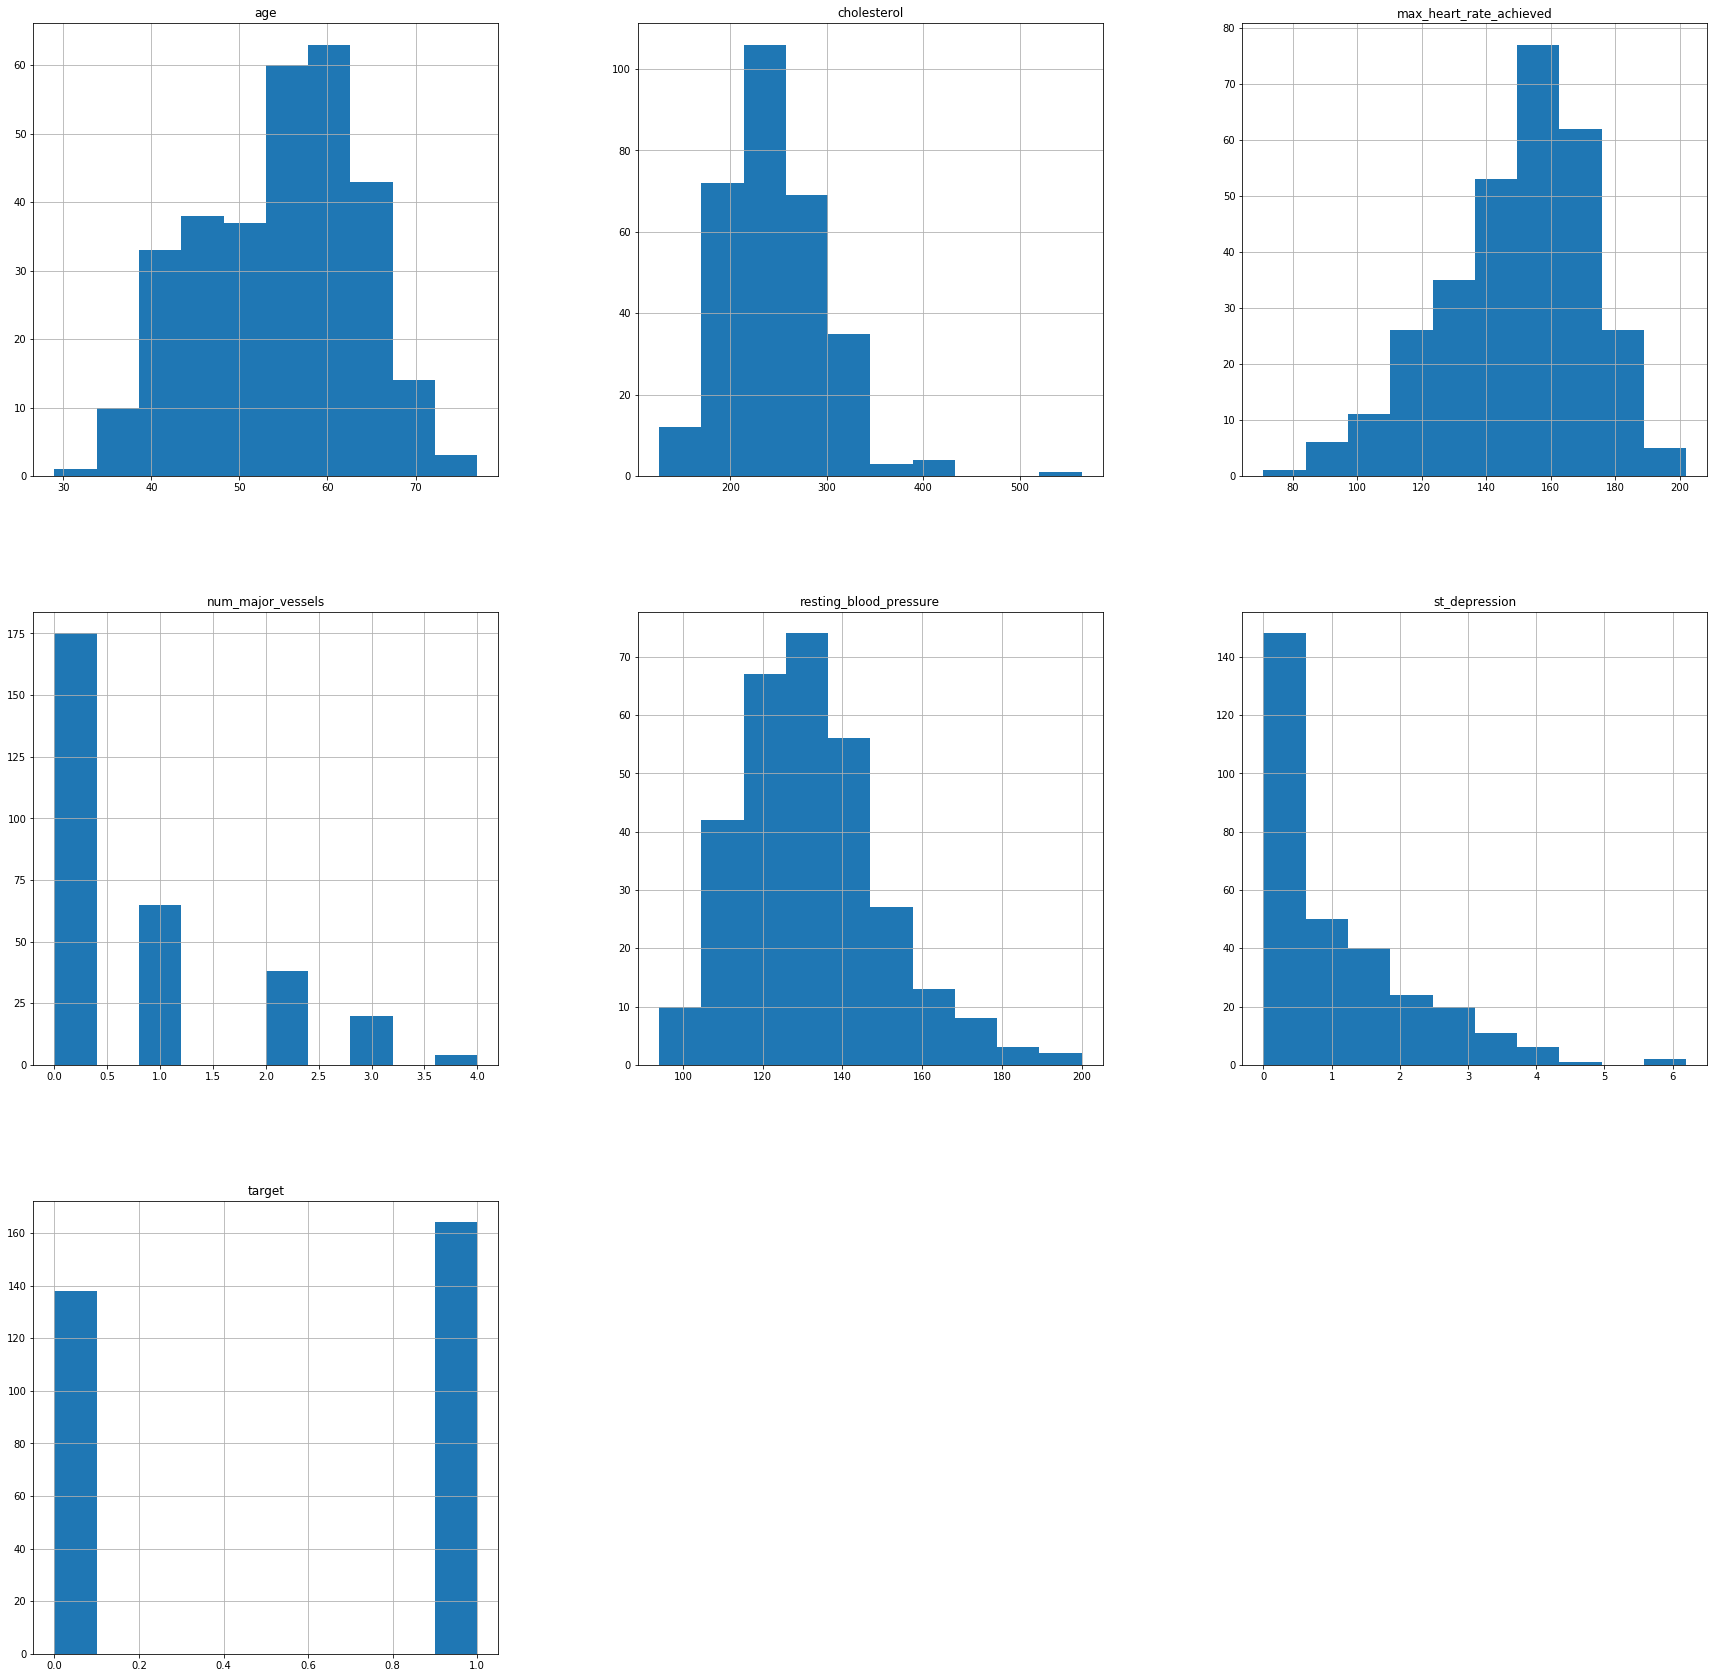

In [26]:
df.hist(figsize=(30,30))
plt.show()

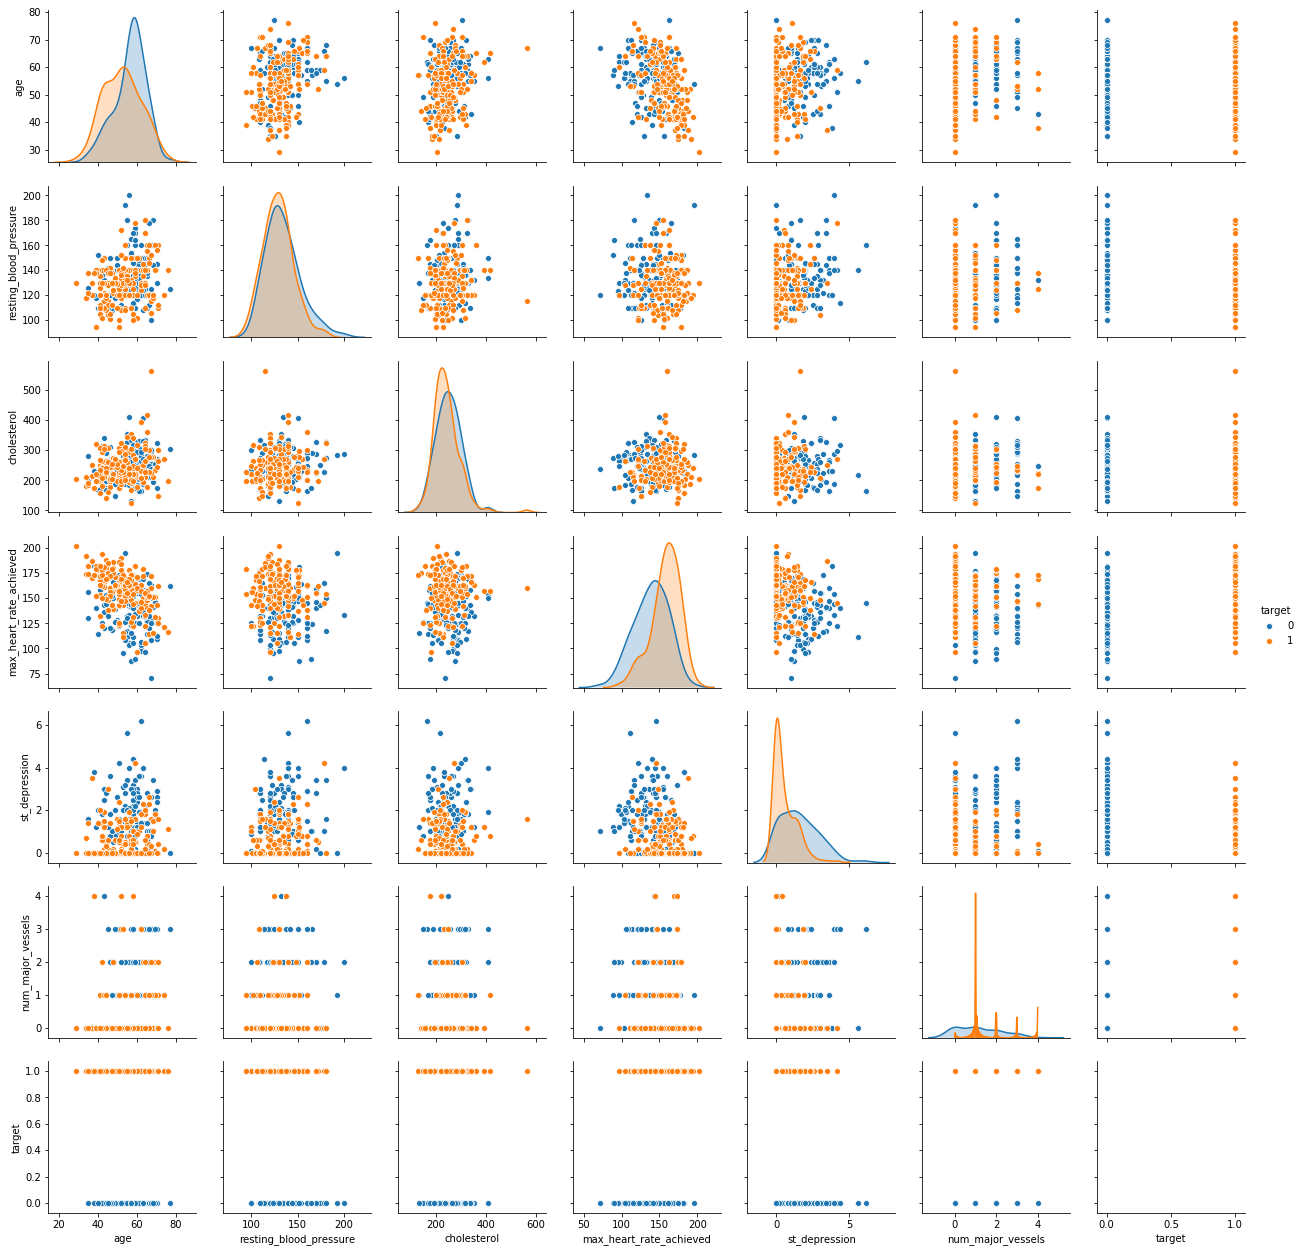

In [27]:
se.pairplot(df, hue="target",diag_kind='kde',kind='scatter')

In [28]:
numerical = df.select_dtypes(exclude=['object'])
categorical = df.select_dtypes(include=['object'])


In [29]:
numerical.columns

Index(['age', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'st_depression', 'num_major_vessels',
       'target'],
      dtype='object')

In [30]:
categorical.columns

Index(['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
       'exercise_induced_angina', 'st_slope', 'thalassemia'],
      dtype='object')

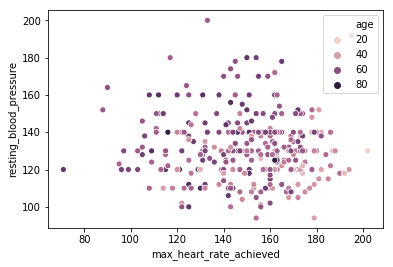

In [31]:
se.scatterplot(x = df['max_heart_rate_achieved'],y = df['resting_blood_pressure'],data= numerical,hue = df['age'])

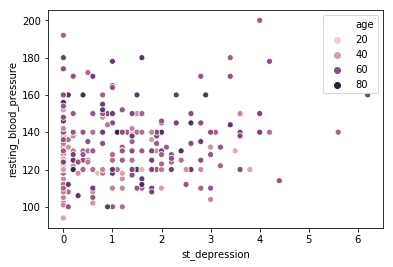

In [32]:
se.scatterplot(x = df['st_depression'],y = df['resting_blood_pressure'],data= numerical,hue = df['age'])

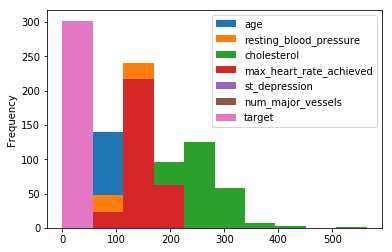

In [33]:
numerical.plot(kind = 'hist')

In [34]:
categorical.columns

Index(['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
       'exercise_induced_angina', 'st_slope', 'thalassemia'],
      dtype='object')

* * 1. ## Feature Engineering 

In [35]:
df.head(100)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1
5,57,male,0,140,192,lower than 120mg/ml,ST-T wave abnormality,148,no,0.4,upsloping,0,normal,1
6,56,female,typical angina,140,294,lower than 120mg/ml,normal,153,no,1.3,upsloping,0,fixed defect,1
7,44,male,typical angina,120,263,lower than 120mg/ml,ST-T wave abnormality,173,no,0.0,flat,0,reversable defect,1
8,52,male,atypical angina,172,199,greater than 120mg/ml,ST-T wave abnormality,162,no,0.5,flat,0,reversable defect,1
9,57,male,atypical angina,150,168,lower than 120mg/ml,ST-T wave abnormality,174,no,1.6,flat,0,fixed defect,1


In [36]:
df['chest_pain_type'].value_counts()
df['chest_pain_type'].replace(0,'atypical angina',inplace=True)

In [37]:
df['st_slope'].value_counts()
df['st_slope'].replace(0,'flat',inplace=True)

In [38]:
df['thalassemia'].value_counts()
df['thalassemia'].replace(0,'fixed defect',inplace=True)


In [39]:
df['sex'] = encoder.fit_transform(df['sex'])
df['chest_pain_type'] = encoder.fit_transform(df['chest_pain_type'])
df['fasting_blood_sugar'] = encoder.fit_transform(df['fasting_blood_sugar'])
df['rest_ecg'] = encoder.fit_transform(df['chest_pain_type'])
df['st_slope'] = encoder.fit_transform(df['st_slope'])
df['thalassemia'] = encoder.fit_transform(df['thalassemia'])


In [40]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [41]:
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.33)

In [43]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Building Baseline Models

('Log Classifier', 0.74)
('Support Vector Classifier', 0.76)
('DT Classifier', 0.76)
('Random Forest', 0.62)
('Extra Tree', 0.62)
('GB Classifier Accuracy', 0.77)
('XGB Classifier Accuracy', 0.76)


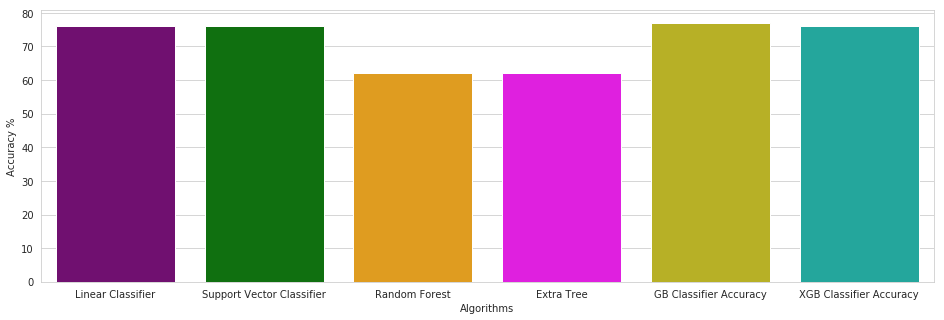

In [44]:
models = []
models.append(('Log Classifier', LogisticRegression()))
models.append(('Support Vector Classifier', SVC()))
models.append(('DT Classifier', DecisionTreeClassifier(random_state=0,max_depth = 10)))
models.append(('Random Forest', RandomForestClassifier(random_state=0,n_estimators=100,min_samples_split=2,min_impurity_decrease=0.1)))
models.append(('Extra Tree', ExtraTreeClassifier(random_state=0,min_samples_leaf=1,max_depth=10)))
models.append(('GB Classifier Accuracy',GradientBoostingClassifier(random_state=0, n_estimators=500, learning_rate=1.0)))
models.append(('XGB Classifier Accuracy',XGBClassifier()))


#evaluate each model in turn
results = []
names = []
for name, model in models:
    model = model.fit(X_train,y_train.ravel())
    predict = model.predict(X_test)
    score = accuracy_score(y_test.ravel(), predict)
    names.append(name)
    msg = name,score
    print(msg)
    
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]
accuracies = {'Linear Classifier':76,'Support Vector Classifier':76,'Random Forest':62,'Extra Tree':62,'GB Classifier Accuracy':77,"XGB Classifier Accuracy":76}

se.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
se.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

### ANN using Three layers and one Dropout


In [45]:
input_dim = X_train.shape[1]
regressor = Sequential()
regressor.add(Dense(13,activation='relu',input_dim = input_dim,kernel_initializer = 'uniform'))
regressor.add(Dense(13,activation='relu'))
regressor.add(Dense(13,activation='relu'))
regressor.add(Dense(13,activation='relu'))
regressor.add(Dropout(0.5))
regressor.add(Dense(1,activation='sigmoid',kernel_initializer='uniform'))
regressor.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



In [46]:
history = regressor.fit(X_train,y_train,batch_size=64,epochs=700,validation_data=(X_test,y_test),verbose=2)
predictions_ann=regressor.predict(X_test)
print(history.history.keys())
regressor.evaluate(x = X_test,y = y_test)

Train on 202 samples, validate on 100 samples
Epoch 1/700
 - 1s - loss: 0.6925 - acc: 0.5792 - val_loss: 0.6917 - val_acc: 0.5100
Epoch 2/700
 - 0s - loss: 0.6915 - acc: 0.5297 - val_loss: 0.6912 - val_acc: 0.5000
Epoch 3/700
 - 0s - loss: 0.6900 - acc: 0.5792 - val_loss: 0.6905 - val_acc: 0.5000
Epoch 4/700
 - 0s - loss: 0.6875 - acc: 0.6040 - val_loss: 0.6893 - val_acc: 0.5100
Epoch 5/700
 - 0s - loss: 0.6837 - acc: 0.5990 - val_loss: 0.6876 - val_acc: 0.5200
Epoch 6/700
 - 0s - loss: 0.6808 - acc: 0.5941 - val_loss: 0.6853 - val_acc: 0.5300
Epoch 7/700
 - 0s - loss: 0.6753 - acc: 0.6386 - val_loss: 0.6823 - val_acc: 0.5400
Epoch 8/700
 - 0s - loss: 0.6699 - acc: 0.6139 - val_loss: 0.6782 - val_acc: 0.5400
Epoch 9/700
 - 0s - loss: 0.6589 - acc: 0.6386 - val_loss: 0.6733 - val_acc: 0.5400
Epoch 10/700
 - 0s - loss: 0.6482 - acc: 0.6733 - val_loss: 0.6668 - val_acc: 0.5600
Epoch 11/700
 - 0s - loss: 0.6316 - acc: 0.6535 - val_loss: 0.6588 - val_acc: 0.6000
Epoch 12/700
 - 0s - loss: 0

[2.5196261596679688, 0.76]

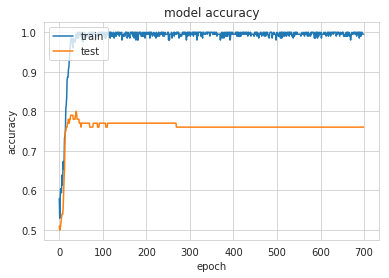

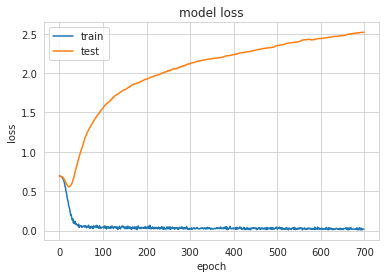

In [47]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Implementing RandomsearchCv** to select best parameters and applying ML Algorithm

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.model_selection import cross_val_score
knn =KNeighborsClassifier()
lr_model = LogisticRegression()
svc_model = SVC(probability=True)
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
params_lg  = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
params_knn = {'n_neighbors':[i for i in range(1,30,2)]}
params_svc = {'kernel':['linear','poly','rbf'],'gamma':[0.1, 1, 10, 100]}
params_dt  = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
param_rf = {'n_estimators':[1, 2, 4, 8, 16, 32, 64, 100, 200],'max_depth':[int(x) for x in np.linspace(1, 32, 32, endpoint=True)]}
param_gb = {'learning_rate':[1, 0.5, 0.25, 0.1, 0.05, 0.01],'n_estimators':[1, 2, 4, 8, 16, 32, 64, 100, 200],'max_depth':[int(x) for x in np.linspace(1, 32, 32, endpoint=True)]}

In [49]:
knn_model = RandomizedSearchCV(estimator=knn,param_distributions=params_knn)
knn_model.fit(X_train,y_train)
knn_model.best_params_

{'n_neighbors': 7}

In [50]:
print('Accuracy Score: ',accuracy_score(y_test,knn_model.predict(X_test)))
print('Using k-NN we get an accuracy score of: ',
      round(accuracy_score(y_test,knn_model.predict(X_test)),5)*100,'%')

Accuracy Score:  0.57
Using k-NN we get an accuracy score of:  56.99999999999999 %


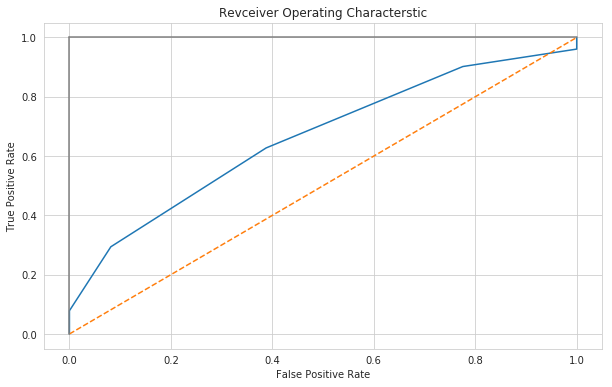

AUC SCORE FOR KNN: 0.6618647458983593


In [51]:
predict_probabilities = knn_model.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_knn,true_positive_rate_knn,threshold_knn = roc_curve(y_test,predict_probabilities)
#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn,true_positive_rate_knn)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("AUC SCORE FOR KNN:",roc_auc_score(y_test,predict_probabilities))


In [52]:
lr_model = RandomizedSearchCV(estimator=lr_model,param_distributions=params_lg)
lr_model.fit(X_train,y_train)
print(lr_model.best_params_)
print('Accuracy Score: ',accuracy_score(y_test,lr_model.predict(X_test)))
print('Using Log Regression we get an accuracy score of: ',
      round(accuracy_score(y_test,lr_model.predict(X_test)),5)*100,'%')

{'penalty': 'l1', 'class_weight': None, 'C': 100}
Accuracy Score:  0.76
Using Log Regression we get an accuracy score of:  76.0 %


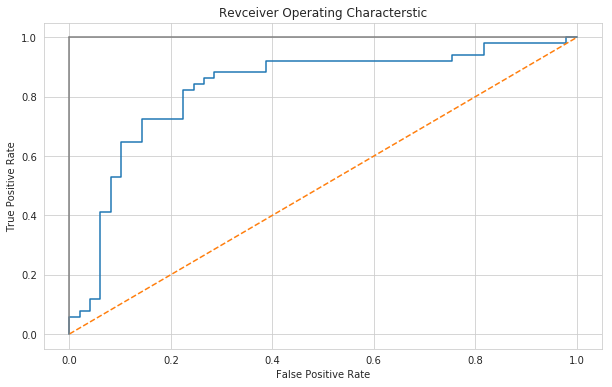

AUC SCORE FOR LR: 0.8283313325330132


In [53]:
predict_probabilities = lr_model.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_knn,true_positive_rate_knn,threshold_knn = roc_curve(y_test,predict_probabilities)
#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn,true_positive_rate_knn)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("AUC SCORE FOR LR:",roc_auc_score(y_test,predict_probabilities))


In [54]:
svc_model = RandomizedSearchCV(estimator=svc_model,param_distributions=params_svc)
svc_model.fit(X_train,y_train)
print(svc_model.best_params_)
print('Accuracy Score: ',accuracy_score(y_test,svc_model.predict(X_test)))
print('Using SVC we get an accuracy score of: ',
      round(accuracy_score(y_test,svc_model.predict(X_test)),5)*100,'%')

{'kernel': 'linear', 'gamma': 1}
Accuracy Score:  0.73
Using SVC we get an accuracy score of:  73.0 %


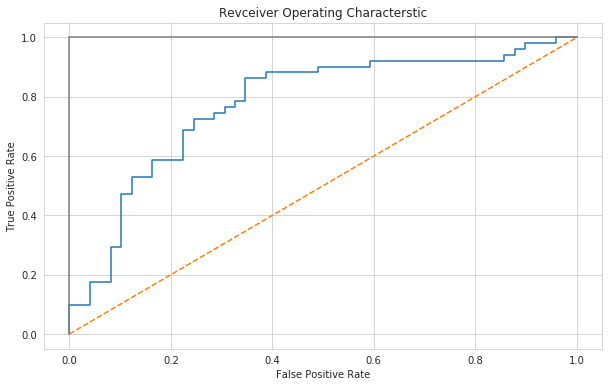

AUC SCORE FOR SVC: 0.7763105242096839


In [55]:
predict_probabilities = svc_model.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_knn,true_positive_rate_knn,threshold_knn = roc_curve(y_test,predict_probabilities)
#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn,true_positive_rate_knn)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("AUC SCORE FOR SVC:",roc_auc_score(y_test,predict_probabilities))


In [56]:
dt_model = RandomizedSearchCV(estimator=dt_model,param_distributions=params_dt)
dt_model.fit(X_train,y_train)
print(dt_model.best_params_)
print('Accuracy Score: ',accuracy_score(y_test,dt_model.predict(X_test)))
print('Using Decision tree we get an accuracy score of: ',
      round(accuracy_score(y_test,dt_model.predict(X_test)),5)*100,'%')

{'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Accuracy Score:  0.64
Using Decision tree we get an accuracy score of:  64.0 %


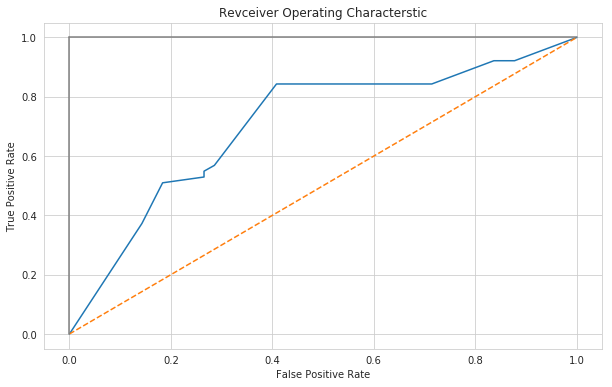

AUC SCORE FOR DecisionTree: 0.7062825130052021


In [57]:
predict_probabilities = dt_model.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_knn,true_positive_rate_knn,threshold_knn = roc_curve(y_test,predict_probabilities)
#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn,true_positive_rate_knn)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("AUC SCORE FOR DecisionTree:",roc_auc_score(y_test,predict_probabilities))


In [58]:
rf_model = RandomizedSearchCV(estimator=rf_model,param_distributions=param_rf)
rf_model.fit(X_train,y_train)
print(rf_model.best_params_)
print('Accuracy Score: ',accuracy_score(y_test,rf_model.predict(X_test)))
print('Using RF we get an accuracy score of: ',
      round(accuracy_score(y_test,rf_model.predict(X_test)),5)*100,'%')

{'n_estimators': 16, 'max_depth': 27}
Accuracy Score:  0.73
Using RF we get an accuracy score of:  73.0 %


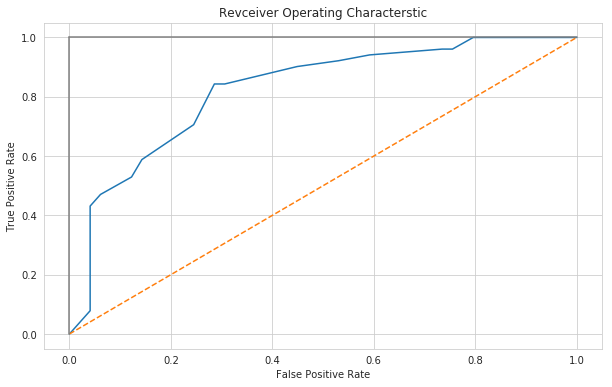

AUC SCORE FOR RandomForest: 0.8233293317326931


In [59]:
predict_probabilities = rf_model.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_knn,true_positive_rate_knn,threshold_knn = roc_curve(y_test,predict_probabilities)
#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn,true_positive_rate_knn)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("AUC SCORE FOR RandomForest:",roc_auc_score(y_test,predict_probabilities))


In [60]:
gb_model = RandomizedSearchCV(estimator=gb_model,param_distributions=param_gb)
gb_model.fit(X_train,y_train)
print(gb_model.best_params_)
print('Accuracy Score: ',accuracy_score(y_test,gb_model.predict(X_test)))
print('Using RF we get an accuracy score of: ',
      round(accuracy_score(y_test,gb_model.predict(X_test)),5)*100,'%')

{'n_estimators': 64, 'max_depth': 28, 'learning_rate': 0.25}
Accuracy Score:  0.74
Using RF we get an accuracy score of:  74.0 %


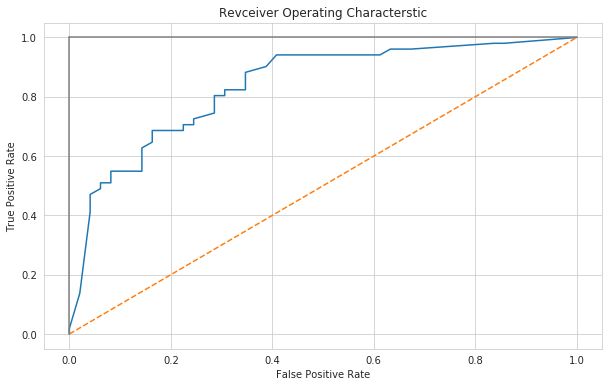

AUC SCORE FOR Gradient boosting: 0.8363345338135254


In [61]:
predict_probabilities = gb_model.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_knn,true_positive_rate_knn,threshold_knn = roc_curve(y_test,predict_probabilities)
#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn,true_positive_rate_knn)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("AUC SCORE FOR Gradient boosting:",roc_auc_score(y_test,predict_probabilities))


##### After performing Randomized Search and analyzing Metrices we came into conclusion that Random Forest gave maximum accuracy and performed well on AUC ROC.Hence we will move for Cross validation of RF Model.

In [62]:
# Evaluate the model using 10-fold cross-validation
clf=rf_model

scores = cross_val_score(clf,X_train,y_train, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

SEED=42
mean_auc = 0.0
n = 10  # repeat the CV procedure 10 times to get more precise results
for i in range(n):
    # for each iteration, randomly hold out 20% of the data as CV set
    X_train, X_cv, y_train, y_cv = train_test_split(
    X_train,y_train, test_size=.20, random_state=i*SEED)

    # train model and make predictions
    clf.fit(X_train, y_train) 
    preds = clf.predict_proba(X_cv)[:, 1]

    # compute AUC metric for this CV fold
    fpr, tpr, thresholds = roc_curve(y_cv, preds)
    roc_auc = auc(fpr, tpr)
    print ("AUC (fold %d/%d): %f" % (i + 1, n, roc_auc))
    mean_auc += roc_auc

print ("Mean AUC: %f" % (mean_auc/n)) 

[0.9047619  0.76190476 0.85714286 0.95       0.75       0.9
 0.75       0.8        1.         0.68421053]
0.8358020050125313
AUC (fold 1/10): 0.895000
AUC (fold 2/10): 0.937500
AUC (fold 3/10): 0.862500
AUC (fold 4/10): 0.900000
AUC (fold 5/10): 0.847222
AUC (fold 6/10): 0.825000
AUC (fold 7/10): 0.983333
AUC (fold 8/10): 0.833333
AUC (fold 9/10): 0.700000
AUC (fold 10/10): 0.833333
Mean AUC: 0.861722


#### Saving the model,OHE and Scaling object as pickle file

In [63]:
# Save the trained model as a pickle string. 
model_pickle_path = 'rf_model.pkl'
ohe_model_path = 'ohe_model.pkl'
scaling_model_path = 'scaled_model.pkl'
 
# Create an variable to pickle and open it in write mode
model_pickle = open(model_pickle_path, 'wb')
ohe_pickle = open(ohe_model_path, 'wb')
scaled_pickle = open(scaling_model_path, 'wb')

saved_model = pickle.dump(rf_model, model_pickle)
saved_ohe = pickle.dump(onehotencoder, ohe_pickle)
saved_sc = pickle.dump(sc, scaled_pickle)

model_pickle.close()
ohe_pickle.close()
scaled_pickle.close()
# Load the pickled model 
rf_from_pickle = open(model_pickle_path, 'rb')
ohe_from_pickle = open(ohe_model_path,'rb')
sc_from_pickle = open(scaling_model_path,'rb')
#decision_tree_model = pickle.load(decision_tree_model_pkl)
rf_from_pickle = pickle.load(rf_from_pickle)
ohe_from_pickle = pickle.load(ohe_from_pickle)
sc_from_pickle = pickle.load(sc_from_pickle)

print(rf_from_pickle)
print(ohe_from_pickle)
print(sc_from_pickle)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs